In [1]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns
import scipy.stats
from matplotlib import pyplot as plt
import math
import openpyxl
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
#Fundo a ser analisado
nome_da_base = 'pagaya'
col_fundos = ['Pagaya Opportunity Fund','Riverview ALF']
nome_benchmark = "IBOXHY Index"
tempo = 12 #252

In [3]:
df=pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_da_base + '.csv',sep =';',index_col=0,decimal=',')

In [4]:
df_mensal = pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_benchmark + '.csv',sep =';',index_col=0,decimal=',')

In [5]:
df = pd.concat([df_mensal, df])

In [6]:
df['Retorno_Positivo'] = np.where(df.Retorno>=0, 1, 0)
df['Retorno_Negativo'] = np.where(df.Retorno<0, 1, 0)
df

MesAno        data                  Product  FinancialPrice Mes_nomial  \
35  09-2021  2021-09-27             IBOXHY Index      331.783905        Sep   
31  08-2021  2021-08-31             IBOXHY Index      330.554413        Aug   
27  07-2021  2021-07-30             IBOXHY Index      329.035614        Jul   
23  06-2021  2021-06-30             IBOXHY Index      327.842102        Jun   
19  05-2021  2021-05-31             IBOXHY Index      324.357513        May   
..      ...         ...                      ...             ...        ...   
4   01-2019  2019-01-31  Pagaya Opportunity Fund      108.426552        Jan   
3   12-2018  2018-12-31  Pagaya Opportunity Fund      107.662148        Dec   
2   11-2018  2018-11-30  Pagaya Opportunity Fund      106.998756        Nov   
1   10-2018  2018-10-31  Pagaya Opportunity Fund      106.170624        Oct   
0   09-2018  2018-09-28  Pagaya Opportunity Fund      105.474495        Sep   

    Mes   Ano  Retorno_1   Retorno  Retorno_Positivo  Retorno_Negativo  
35    9  2021        NaN       NaN                 0                 0  
31    8  2021   1.003719  0.371945                 1                 0  
27    7  2021   1.004616  0.461590                 1                 0  
23    6  2021   1.003641  0.364053                 1                 0  
19    5  2021   1.010743  1.074302                 1                 0  
..  ...   ...        ...       ...               ...               ...  
4     1  2019   1.006100  0.609994                 1                 0  
3    12  2018   1.007100  0.709999                 1                 0  
2    11  2018   1.006200  0.619996                 1                 0  
1    10  2018   1.007800  0.779998                 1                 0  
0     9  2018   1.006600  0.660002                 1                 0  

[114 rows x 11 columns]

In [36]:
df.to_excel('book_empilhado.xlsx')

In [36]:
df_sub = df.pivot(index=["data","Ano","Mes"], columns="Product", values="Retorno")
df_sub = df_sub.reset_index()
df_sub=df_sub.dropna()

In [26]:
df_sub.to_excel('book_colunas.xlsx')

In [7]:
def f(x):    
 return x - df_sub[nome_benchmark] 

In [37]:
df_sub1 = df_sub.apply(lambda x: f(x) if x.name in col_fundos else x)

In [38]:
df_sub1

Product        data   Ano  Mes  IBOXHY Index  Pagaya Opportunity Fund  \
9        2018-09-28  2018    9         0.324                    0.336   
10       2018-10-31  2018   10        -1.124                    1.904   
11       2018-11-30  2018   11        -0.843                    1.463   
12       2018-12-31  2018   12         2.046                   -1.336   
13       2019-01-31  2019    1         1.620                   -1.010   
14       2019-02-28  2019    2         0.958                   -0.298   
15       2019-03-29  2019    3         1.288                   -0.638   
16       2019-04-30  2019    4         0.046                    0.724   
17       2019-05-31  2019    5         1.245                   -0.705   
18       2019-06-28  2019    6         0.409                    0.221   
19       2019-07-31  2019    7         0.438                    0.202   
20       2019-08-30  2019    8         0.684                   -0.144   
21       2019-09-30  2019    9         0.389                    0.341   
22       2019-10-31  2019   10         0.067                    0.563   
23       2019-11-29  2019   11         1.917                   -1.287   
24       2019-12-31  2019   12         0.602                    0.068   
25       2020-01-31  2020    1         0.376                    0.284   
26       2020-02-28  2020    2        -1.228                    1.888   
27       2020-03-31  2020    3        -6.993                    9.693   
28       2020-04-30  2020    4         2.493                   -1.283   
29       2020-05-29  2020    5         3.108                   -0.948   
30       2020-06-30  2020    6         1.363                   -0.573   
31       2020-07-31  2020    7         0.749                    0.631   
32       2020-08-31  2020    8         0.226                    0.394   
33       2020-09-30  2020    9         0.197                    0.473   
34       2020-10-30  2020   10         2.380                   -1.590   
35       2020-11-30  2020   11         1.683                   -0.893   
36       2020-12-31  2020   12         0.559                    0.271   
37       2021-01-29  2021    1         0.625                    0.135   
38       2021-02-26  2021    2        -0.460                    1.030   
39       2021-03-31  2021    3         0.945                   -0.385   
40       2021-04-30  2021    4         0.268                    0.292   
41       2021-05-31  2021    5         1.074                   -0.424   

Product  Riverview ALF  
9               -0.204  
10               1.733  
11               1.399  
12              -1.513  
13              -1.120  
14              -0.362  
15              -0.812  
16               1.820  
17              -0.505  
18               1.268  
19               0.248  
20               0.163  
21               0.150  
22               0.968  
23              -1.387  
24              -0.066  
25               0.637  
26              -4.165  
27               7.123  
28              -1.230  
29              -0.457  
30               0.138  
31               0.677  
32               0.876  
33               1.365  
34              -0.926  
35               2.933  
36               3.096  
37               1.972  
38               9.215  
39              -0.876  
40               1.795  
41               0.989

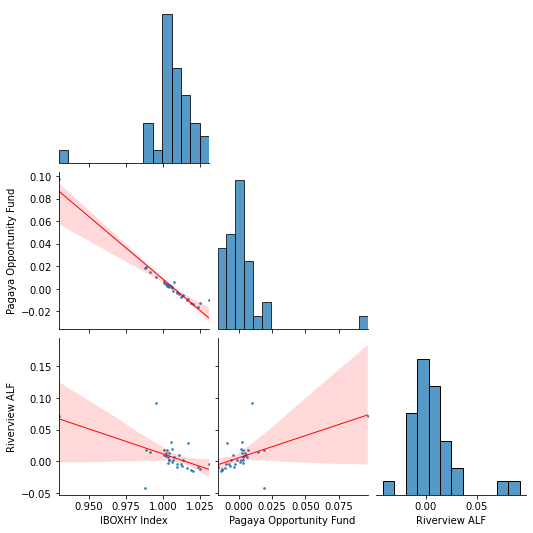

In [29]:
sns.pairplot(data=df_sub1.iloc[:,3:],kind="reg",plot_kws={'line_kws':{'color':'red','lw':1},'scatter_kws': {'s': 3}},corner= True)


In [40]:
#Retorno Mensal
def function_retorno_relativo(df,i):
    pivot_table = pd.pivot_table(df,index=['Ano'],values=[col_fundos[i]],fill_value=0,aggfunc='prod',columns=['Mes'])#,margins=True,margins_name="Year")
    pivot_table = (pivot_table )
    pivot_table=pivot_table.rename(columns={1: 'Jan', 2:"Feb",3:"Mar", 4:"Apr", 5:"May", 6:"Jun",7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec",'Retorno_1':"Month Holding Period Yield"})
    # backgroung color mapping
    my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
    pd.options.display.float_format = "{:,.3f}".format
    pivot_table.style.background_gradient(cmap=my_cmap,vmin = -5,vmax = 5).to_excel('pivot_table_'+col_fundos[i]+'.xlsx')


In [41]:
for i in range(len(col_fundos)):
    function_retorno_relativo(df_sub1,i)

In [70]:
def vol_anualizada(x):
    return x.std() * (tempo**(1/2))

def retorno_anualizado(x,tempo):
    return (x.product()**(tempo/float(x.count())) - 1) * 100

def MDD(x):
    return min(((x/x.cummax()) - 1)*100)

def tracking_error(x,y):
    return (x-y).std()

def retorno_total(x):
    return (x.prod() - 1)*100

def Dias_Positivos(x):
    return x.sum()

def Dias_Negativos(x):
    return x.sum()


df.sort_values(by=["Product",'data'],ascending=False,inplace=True)
table = df.groupby('Product').agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_Negativo":Dias_Negativos,"Retorno_Positivo": Dias_Positivos,"Retorno_1" : [retorno_total, lambda x: retorno_anualizado(x,tempo)]}).rename(columns={'vol_anualizada':'Volatilidade Anualizada','<lambda_0>' :'Retorno Anualizado','retorno_total':'Retorno Total'})
table.columns = table.columns.droplevel(0)
table["Sharpe"] = table["Retorno Anualizado"] / table["Volatilidade Anualizada"]



df.sort_values(by=["Product",'data'],ascending=True,inplace=True)
table2 = df.groupby('Product').agg({"FinancialPrice":MDD}).rename(columns={"FinancialPrice":"Maximo Drawdown"})

tab = pd.concat([table,table2],axis=1).T
tab


Product                  IBOXHY Index  Pagaya Opportunity Fund  Riverview ALF
count                          45.000                   33.000         33.000
max                             3.108                    2.700          8.755
min                            -6.993                    0.540         -5.394
mean                            0.477                    0.813          1.284
Volatilidade Anualizada         5.073                    1.579          7.056
Dias_Negativos                  8.000                    0.000          1.000
Dias_Positivos                 37.000                   33.000         32.000
Retorno Total                  23.279                   30.590         51.377
Retorno Anualizado              5.739                   10.192         16.272
Sharpe                          1.131                    6.454          2.306
Maximo Drawdown                -8.135                    0.000         -5.394

In [71]:
table2

Maximo Drawdown
Product                                 
IBOXHY Index                      -8.135
Pagaya Opportunity Fund            0.000
Riverview ALF                     -5.394

In [149]:
#Descritivas anuais
df.groupby(['Ano','Product']).agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_1" : [lambda x: retorno_anualizado(x,tempo)]}).unstack().T.reset_index().iloc[: , 1:]

Ano         level_1                  Product   2017   2018   2019     2020  \
0             count             IBOXHY Index  1.000 12.000 12.000   12.000   
1             count  Pagaya Opportunity Fund    nan  4.000 12.000   12.000   
2             count            Riverview ALF    nan  4.000 12.000   12.000   
3               max             IBOXHY Index  0.859  2.046  1.917    3.108   
4               max  Pagaya Opportunity Fund    nan  0.780  0.770    2.700   
5               max            Riverview ALF    nan  0.609  1.866    4.616   
6               min             IBOXHY Index  0.859 -1.124  0.046   -6.993   
7               min  Pagaya Opportunity Fund    nan  0.620  0.540    0.620   
8               min            Riverview ALF    nan  0.120  0.476   -5.394   
9              mean             IBOXHY Index  0.859  0.198  0.805    0.410   
10             mean  Pagaya Opportunity Fund    nan  0.692  0.642    1.105   
11             mean            Riverview ALF    nan  0.455  0.836    1.248   
12             prod             IBOXHY Index  0.859 -0.035  0.000    2.551   
13             prod  Pagaya Opportunity Fund    nan  0.227  0.005    0.721   
14             prod            Riverview ALF    nan  0.022  0.030 -215.596   
15   vol_anualizada             IBOXHY Index    nan  3.409  2.087    9.089   
16   vol_anualizada  Pagaya Opportunity Fund    nan  0.239  0.228    2.321   
17   vol_anualizada            Riverview ALF    nan  0.781  1.622    8.407   
18         <lambda>             IBOXHY Index 10.811  2.347 10.080    4.619   
19         <lambda>  Pagaya Opportunity Fund    nan  8.634  7.977   14.069   
20         <lambda>            Riverview ALF    nan  5.591 10.488   15.679   

Ano   2021  
0    8.000  
1    5.000  
2    5.000  
3    1.074  
4    0.760  
5    8.755  
6   -0.460  
7    0.560  
8    0.069  
9    0.456  
10   0.620  
11   3.109  
12  -0.005  
13   0.088  
14   6.663  
15   1.625  
16   0.301  
17  11.432  
18   5.601  
19   7.699  
20  43.708

In [88]:
#Descritivas mensais

df[['Retorno','MesAno','Product']].groupby(['MesAno','Product']).describe().unstack()


Retorno                                                     \
               count                                               mean   
Product IBOXHY Index Pagaya Opportunity Fund Riverview ALF IBOXHY Index   
MesAno                                                                    
01-2018        1.000                     nan           nan       -0.532   
01-2019        1.000                   1.000         1.000        1.620   
01-2020        1.000                   1.000         1.000        0.376   
01-2021        1.000                   1.000         1.000        0.625   
02-2018        1.000                     nan           nan       -0.866   
02-2019        1.000                   1.000         1.000        0.958   
02-2020        1.000                   1.000         1.000       -1.228   
02-2021        1.000                   1.000         1.000       -0.460   
03-2018        1.000                     nan           nan        1.222   
03-2019        1.000                   1.000         1.000        1.288   
03-2020        1.000                   1.000         1.000       -6.993   
03-2021        1.000                   1.000         1.000        0.945   
04-2018        1.000                     nan           nan       -0.569   
04-2019        1.000                   1.000         1.000        0.046   
04-2020        1.000                   1.000         1.000        2.493   
04-2021        1.000                   1.000         1.000        0.268   
05-2018        1.000                     nan           nan        0.924   
05-2019        1.000                   1.000         1.000        1.245   
05-2020        1.000                   1.000         1.000        3.108   
05-2021        1.000                   1.000         1.000        1.074   
06-2018        1.000                     nan           nan        0.511   
06-2019        1.000                   1.000         1.000        0.409   
06-2020        1.000                   1.000         1.000        1.363   
06-2021        1.000                   0.000         0.000        0.364   
07-2018        1.000                     nan           nan        0.829   
07-2019        1.000                   1.000         1.000        0.438   
07-2020        1.000                   1.000         1.000        0.749   
07-2021        1.000                     nan           nan        0.462   
08-2018        1.000                     nan           nan        0.451   
08-2019        1.000                   1.000         1.000        0.684   
08-2020        1.000                   1.000         1.000        0.226   
08-2021        1.000                     nan           nan        0.372   
09-2018        1.000                   1.000         1.000        0.324   
09-2019        1.000                   1.000         1.000        0.389   
09-2020        1.000                   1.000         1.000        0.197   
09-2021        0.000                     nan           nan          nan   
10-2018        1.000                   1.000         1.000       -1.124   
10-2019        1.000                   1.000         1.000        0.067   
10-2020        1.000                   1.000         1.000        2.380   
11-2018        1.000                   1.000         1.000       -0.843   
11-2019        1.000                   1.000         1.000        1.917   
11-2020        1.000                   1.000         1.000        1.683   
12-2017        1.000                     nan           nan        0.859   
12-2018        1.000                   1.000         1.000        2.046   
12-2019        1.000                   1.000         1.000        0.602   
12-2020        1.000                   1.000         1.000        0.559   

                                                            \
                                                       std   
Product Pagaya Opportunity Fund Riverview ALF IBOXHY Index   
MesAno                                                       
01-2018       

In [89]:
df.Product.unique()

array(['Riverview ALF', 'Pagaya Opportunity Fund', 'IBOXHY Index'],
      dtype=object)

In [90]:
#Calculo dos retornos mensais
mensal = df[['Product','MesAno','Retorno_1']].groupby(['MesAno','Product']).agg(['prod']).unstack()#, 'min', 'max','std','count'

mensal.columns = mensal.columns.droplevel(0).droplevel(0)
mensal  = mensal.reset_index()
mensal[['ibov','paiva']] = mensal[['ibov','paiva']]*100 -100
mensal

KeyError: "None of [Index(['ibov', 'paiva'], dtype='object', name='Product')] are in the [columns]"

In [ ]:
df

In [ ]:
#Media Simples
{'paiva': mensal.paiva.mean(),'ibov': mensal.ibov.mean()}

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
mensal.select_dtypes(include=numerics).columns
for i in mensal.select_dtypes(include=numerics).columns:
    sns.kdeplot(mensal[i], label=i, shade=True)

plt.title('')
plt.xlabel('')
plt.legend()
plt.show()

In [ ]:
anual = df.groupby(['Product','Ano'])[['Product','Ano','Retorno']].agg(['mean', 'count', 'std']).Retorno

ci95_hi = []
ci95_lo = []

for i in anual.index:
    m, c, s = anual.loc[i]
    ci95_hi.append(m + 1.95*s/math.sqrt(c))
    ci95_lo.append(m - 1.95*s/math.sqrt(c))

anual['ci95_hi'] = ci95_hi
anual['ci95_lo'] = ci95_lo
print(anual)

In [ ]:

#some example data
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [ ]:
#some confidence interval
x=1
z=mean_confidence_interval(mensal.ibov,confidence=0.95)

fig, ax = plt.subplots()
ax.plot(x,z[0])
ax.fill_between(z[0], z[1], z[2], color='b', alpha=.1)

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, (m-h), (m+h)

mean_confidence_interval(mensal.ibov,confidence=0.95)

In [ ]:
mean_confidence_interval(mensal.paiva,confidence=0.95)


In [ ]:
df.Product.unique()

In [ ]:
df[['Retorno','Product']]

In [ ]:

sns.kdeplot(data=df,x = 'Retorno',hue = 'Product')

In [ ]:
df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'IBX Index') ]

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IFMMIFMM Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)